There are a lot of different optimization algorithms out there, and many of them are of the so-called "local" variety, which is usually the same as being some flavor of gradient descent. Many of these algorithms come with fancy convergence guarantees, but these results may not translate into practical speediness. In this post I'll set up an optimization olympics and we can see who does well. I'll also try to introduce each algorithm with some theoretical justification or motivation.

We'll consider two main "events" in our olympics. The first is ordinary convex optimization. In this event there is some convex set $S$ and a known convex objective function $J:S\to \R$ which has a unique minimum at $J(w_\star)=\inf_{w\in S}J(w)$. Our algorithms will produce a series of points $w_1,w_2,\dots$ in $S$ such that (hopefully!) $\lim_{t\to\infty} w_t = w_\star$. The second event is stochastic optimization. In this event we don't actually know the objective function $J$. Instead, we are allowed to obtain i.i.d. samples $\hat J_1,\hat J_2,\cdots$ such that $\E[\hat J_i] = J$. Again, we wish to have a sequence of points converging to the optimal point.

<h2>Subgradient Descent</h2>

I've discussed this algorithm in the online setting <a href=http://artishoke.com/notes/online-gradient-descent.html>previously</a>. Here we'll discuss subgradient descent in terms of actual convergence to an optimal point. In the online learning setting we proved bounds on the regret, but low-regret does not immediately imply that the vectors $w_t$ actually converge to anything. So let's fix this problem. First of all, let's recall what we're actually talking about here. A <i>subgradient</i> of $J$ at $w$ is any vector $g$ such that $J(w)+g\cdot(w'-w)\le J(w')$. This is a generalization of the ordinary gradient for non-differentiable convex functions. When $J$ is differentiable at $w$, then the only subgradient is $\nabla J(w)$. We call the set of subgradients at $w$ the <i>subdifferential</i> and write it as $\partial J(w)$. Now let's write down the subgradient descent procedure:

<div class = "algorithm">
<h4>Subgradient Descent:</h4>
<ol>
<li> Initialize $x_1=0$, $w_1=\Pi_S(x_1)$, where $\Pi_S(x)= \argmin_{w\in S}(x)$ is the <i>projection</i> onto the convex set $S$.
<br>
For each $t=1,2,\dots$</li>
<li> Predict $w_t=\Pi_S(x_t)$.</li>
<li> Receive subgradient $g_t\in \partial J(w_t)$.</li>
<li> Update $x_{t+1}=x_t-\eta_t g_t$.</li>
</ol>
</div>

Here $\eta_t$ is some <i>learning rate</i> that might change with time. For online learning the best thing to do is to set $\eta_t\propto \frac{1}{\sqrt{t}}$, yielding a regret bound of $O(\sqrt{t})$. However, low regret doesn't actually imply convergence of anything. Fortunately, this is fixable. Instead of considering the sequence $w_1,w_2,\dots$, set $w'_T=\frac{1}{T}\sum_{t=1}^T w_t$. Then we can show that the sequence $w'_1,w'_2,\dots$ converges. The proof is simple:
$$
\frac{1}{T} \sum_{t=1}^T J(w_t)-J(w_\star)\le O\left(\frac{1}{\sqrt{T}}\right)\\
J\left(\frac{1}{T}\sum_{t=1}^T w_t\right)-J(w_\star)\le O\left(\frac{1}{\sqrt{T}}\right)\\
J(w'_T)-J(w_\star)\le O\left(\frac{1}{\sqrt{T}}\right)
$$
where the second line follows from Jenson's inequality. Since we assume $w_\star$ is a unique minimum of $J$, this implies that $w'_t\to w_\star$. Notice that we don't have any sort of result about the speed at which $w'_t$ converges to $w_\star$. Instead, we have information about the rate at which $J(w'_t)$ converges to $J(w_\star)$. Personally I think this type of information is often more valuable - I'm interested in minimizing $J$ and the knowing the actual value of $w_\star$ isn't extremely important.

At this point we'll make a digression and consider <i>strongly-convex</i> objectives $J$. That is, there exists some $\sigma>0$ such that $D_J(w'\|w)\ge \frac{\sigma}{2}\|w'-w\|^2$. Where $D_J$ represents the Bregman divergence. In this case it turns out we can get $O(\log(T))$ regret, which translates to $J(w'_t)$ converging at a rate of $O\left(\frac{\log(t)}{t}\right)$ using the above argument. The algorithm is simple: set $\eta_t = \frac{1}{\sigma t}$. Then if the gradients $g_t=\nabla J(w_t)$ all have norm at most $L$, we have

$$
J(w_\star)-J(w_t) - g_t(w_\star-w_t)\ge \frac{\sigma}{2}(w_t-w_\star)^2\\
J(w_t)-J(w_\star)\le g_t(w_t-w_\star)-\frac{\sigma}{2}(w_t-w_\star)^2
$$
This is a generalization of the inequality $J(w_t)-J(w_\star)\le g_t(w_t-w_\star)$ that we used previously in the non-strongly-convex case. We apply a similar style of reasoning to obtain our bounds:
$$
\begin{align*}
(w_t-w_\star)^2 &\le (w_{t+1}-\eta_t g_t-w_\star)^2\\
&= (w_{t+1}-w_\star)^2 -2\eta_t g_t +\eta_t^2 g_t^2\\
g_t(w_t-w_\star)-\frac{\sigma}{2} (w_t-w_\star)^2 &\le \left(\frac{1}{2\eta_t}-\frac{\sigma^2}{2}\right)(w_t-w_\star)^2 -\frac{1}{2\eta_t}(w_{t+1}-w_\star)^2 +\frac{\eta_t}{2}g_t^2\\
\sum_{t=1}^T g_t(w_t-w_\star)-\frac{\sigma}{2} (w_t-w_\star)^2 &\le \left(\frac{1}{2\eta_1}-\frac{\sigma^2}{2}\right)(w_1-w_\star)^2 +\sum_{t=2}^T \left(\frac{1}{2\eta_{t-1}}-\frac{\sigma^2}{2}-\frac{1}{2\eta_t}\right)(w_t-w_\star)^2 -\frac{1}{2\eta_T}(w_{t+1}-w_\star)^2 +\sum_{t=1}^T \frac{\eta_t}{2}g_t^2\\
&\le \left(\frac{1}{2\eta_1}-\frac{\sigma}{2}\right)(w_1-w_\star)^2 +\sum_{t=1}^T \frac{\eta_t}{2}g_t^2\\
&=\frac{(\log(t)+1)L^2}{\sigma}=O(\log(t))
\end{align*}
$$

Of course, this "averaging" trick may not be what you were really looking for in a convergence of gradient descent algorithm. Can we say anything about the convergence of the actual $w_t$ themselves? As you might imagine, we can. However, things are a little strange. It'll turn out that for <i>stochastic</i> problems we can only guarantee convergence when $\eta_t$ satisfies $\sum_{t=1}^\infty \eta_t =\infty$ and $\sum_{t=1}^\infty \eta_t^2 <\infty$. Notice that this is satisfied for the strongly-convex case, but not for the ordinary convex case - in fact the $\frac{1}{\sqrt{t}}$ rate is just barely too slow to not guarantee convergence. 

Leon Bottou discuses some recommendations for learning rate selection <a href=http://research.microsoft.com/pubs/192769/tricks-2012.pdf>here</a>. In particular, he suggests that we use rates of the form $\eta_t = \frac{\gamma_0}{1+\gamma_0\sigma t}$ for $\sigma$-strongly convex problems.

<h2>Newton's Algorithm</h2>

Intuitively, gradient descent makes use of the Taylor series expansion $J(w_\star)=J(w)+\nabla J(w)\cdot (w_\star-w) +O((w_\star-w)^2)$. Newton algorithms go one step futher: $J(w_\star)=J(w)+\nabla J(w)\cdot (w_\star-w) +\frac{1}{2}(w_\star-w)^TH(w_\star-w)+O((w_\star-w)^3)$ where $H$ is the matrix of second derivatives of $J$, the <i>Hessian</i>. The classical method that you may learn in a first calculus course is to assume that the second order Taylor expansion is exact and minimize it at every step:

$$
w_{t+1} = \argmin_{w}\left[J(w_t)+\nabla J(w_t)\cdot (w-w_t)+\frac{1}{2}(w-w_t)^TH_t(w-w_t)\right]=w_t-H_t^{-1}\nabla J(w_t)
$$

It turns out in practice the thing to do is to add some kind of learning rate: $w_{t+1} = w_t-\eta_t H_t^{-1}\nabla J(w_t)$.

As an aside, if you go back over the strongly-convex online optimization argument again, you might notice that we were being a little weaker than necessary. In general, it's actually possible to set $w_{t+1} = w_{t} - \left(\sum_{t'=1}^{t} H_t\right)^{-1} g_t$ and get logarithmic regret. 

Newton's algorithm is actually pretty slow computationally because it has to handle the entire Hessian $H$ (and even invert it!). This is an $O(d^3)$ operation (or $O(d^{2.7}$ if you're <a href =https://en.wikipedia.org/wiki/Strassen_algorithm>really fancy</a> I believe), while the other so-called first-order schemes just do an $O(d)$ operation each update. Because of this it turns out that for large-scale problems second-order methods are just not worth the extra computation since they extra convergence speed per iteration is offset by the faster number of iterations per second for first-order methods. See <a href=http://papers.nips.cc/paper/3323-the-tradeoffs-of-large-scale-learning.pdf>this paper</a> for more detail on this.


<h2>Nesterov's Accelerated Gradient</h2>

The accelerated gradient method formalizes a notion that you'll often see mentioned in Neural Network literature: momentum. Momentum means that we record a history of $\nabla J(w_t)$: instead of making a step just in the direction of $\nabla J(w_t)$ we make a step in a direction obtained from averaging previous observations of $\nabla J(w_t)$. I've seen a few different motivations for why this is a good idea. One is that in the stochastic setting this averaging can help deal with some of the noise. I've also seen some sources suggest that momentum helps "jump" over local minima in non-convex problems. Personally this argument seems a little thin to me, but then no argument for solving non-convex problems is likely to actually have a convincing theoretical justification.

In any event, here is (a version of) Nesterov's accelerated gradient method:

<div class = "algorithm">
<h4>Accelerated Gradient Descent:</h4>
<ol>
<li> Recieve input $\beta$-strong-smooth convex function $J$ to optimize, initialize $w_0=x_0=0$.
<br>
For each $t=1,2,\dots$</li>
<li> Set $w_t = x_{t-1}-\frac{1}{\beta}\nabla J(x_{t-1})$.</li>
<li> Set $x_t = w_t + \frac{t-1}{t+2} (w_t-w_{t-1})$.</li>
</ol>
</div>

This version of the updates is from <a href=http://stanford.edu/~boyd/papers/ode_nest_grad.html>this paper</a>. A slightly different update can be found in <a href=https://blogs.princeton.edu/imabandit/2013/04/01/acceleratedgradientdescent/>these</a> lecture notes, which also give a relatively simple (but in my opinion not very inuitively illuminating) proof of convergence. In any event, this algorithm enjoys the congergence rate:
$$
J(w_t)-J(w_\star)=O\left(\frac{\beta\|w_0-w_\star\|^2}{t^2}\right)
$$

which is obviously doing pretty well compared to the $O(1/\sqrt{t})$ or $O(1/t)$ bounds we had for our other methods.

Recently (again, see Su, Boyd and Candes's <a href=http://stanford.edu/~boyd/papers/ode_nest_grad.html>paper</a>, or O'Donoghue and Candes's <a href=http://arxiv.org/abs/1204.3982>paper</a>) there have been some interesting improvements to this in the case when $J$ is $\sigma$-strongly convex. The idea is relatively intuitive, even if the theoretical justification is not. The "momentum" components of Nesterov's scheme are in some way overactive in the strongly convex case and result in jumping over the global minimum. So to correct this we simply reset the momentum accumulation anytime it starts to decrease, since this indicates that the gradient is pointing the other way and so we must have "gone too far":

<div class = "algorithm">
<h4>Restarted Accelerated Gradient Descent:</h4>
<ol>
<li> Recieve input $\sigma$-strongly convex, $\beta$-strongly-smooth convex function $J$ to optimize and constant $k_{min}$, initialize $w_0=x_0=0$, $k=1$.
<br>
For each $t=1,2,\dots$</li>
<li> Set $w_t = x_{t-1}-\frac{1}{\beta}\nabla J(x_{t-1})$.</li>
<li> Set $x_t = w_t + \frac{k-1}{k+2} (w_t-w_{t-1})$.</li>
If $\|w_t-w_{t-1}\|<\|w_{t-1}-w_{t-2}\|$ and $k>k_{min}$:
<li> Set $k=1$.</li>
Else:
<li> Set $k=k+1$.</li>
</ol>
</div>

This algorithm actually achieves exponential convergence (this is called "linear" in convex optimization literature, because they enjoy being confusing):
$$
J(w_t)-J(w_\star) \le A \frac{\beta \|w_0-w_\star\|^2}{2} e^{-Bt\beta}
$$
where $A$ and $B$ depend on the ratio $\sigma/\beta$ (known as the condition number).


There are a plethora of variations on these schemes, but these are the main ideas, so let's try to do some experiments. We'll consider first a strongl-convex and strongly-smooth regression setting, and then a not-strongly-anything classification setting.

In [687]:
# <!-- hide=True -->
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [654]:
# <!-- hide=True -->
# <!-- collapse=False -->
def generate_Xb(n,d,skew=False):
    if(skew==False):
        wstar = np.random.normal(0,1.0/np.sqrt(d),d)
        X = np.random.normal(0,1.0/np.sqrt(d),(n,d))
    else:
        wstar = np.random.normal(0,1.0,d)
        wstar *= np.random.poisson(1,d)
        C = np.random.normal(0,1,(d,d))
        C = np.dot(np.transpose(C),C)
        C= C/np.linalg.norm(C.flatten())
        X = np.random.multivariate_normal(np.zeros(d),C,n)
    wstar *= np.sqrt(n)/np.linalg.norm(np.dot(X,wstar))
    b = np.dot(X,wstar)
    return X,b

def get_strong_convex_smooth(X,b):
    eigenvals,eigenvectors = np.linalg.eigh(np.dot(np.transpose(X),X)/len(b))
    return np.min(eigenvals),np.max(eigenvals)

def loss(X,b,w):
    error = np.dot(X,w)-b
    return 0.5*np.dot(error,error)/len(b)

def full_gradient(X,b,w):
    error = np.dot(X,w)-b
    return np.dot(np.transpose(X),error)/len(b)

def stoch_gradient(X,b,w):
    random_index = np.random.random_integers(0,len(b)-1)
    error = np.dot(X[random_index],w)-b[random_index]
    return X[random_index]*error

def hinge_loss(X,b,w):
    #true value is sign of b.
    
    y = np.sign(b)
    scores = y*np.dot(X,w)
    errors = np.sign(scores)*0.5+0.5
    hingevector = np.maximum(0.0,1.0-scores)
    
    #return np.average(errors) #use this for true 0-1 loss
    return np.average(hingevector) #use this to return hinge loss

def hinge_grad(X,b,w):
    y = np.sign(b)
    scores = np.dot(X,w)
    test = -y
    test[y*scores>1.0]=0.0
    grad = np.dot(test,X)
    return grad/len(b)

def stoch_hinge_loss(X,b,w):
    random_index = np.random.random_integers(0,len(b)-1)
    y = np.sign(b[random_index])
    return max(0,1.0-np.dot(X[random_index],w)*y)

def stoch_hinge_grad(X,b,w,i=None):
    if(i==None):
        random_index = np.random.random_integers(0,len(b)-1)
    else:
        random_index = i
    ys = np.sign(b)
    scores = np.dot(X,w)
    test = -ys
    test[ys*scores>1.0]=0.0
    realgrad = test[random_index]*X[random_index]
    
    y = np.sign(b[random_index])
    score = np.dot(X[random_index],w)

    
    if(y*score<1):
        grad = -y*X[random_index]
    else:
        grad = np.zeros(np.shape(w))
    return grad

def test_grad(loss,grad,stoch_grad,d):
    w = np.random.normal(0,10/np.sqrt(d),d)
    eps = 0.0001
    
    delta = np.zeros(d)
    ngrad = np.zeros(d)
    lossw = loss(w)
    for i in xrange(d):
        delta[i] = eps
        losswplusdelta=loss(w+delta)
        ngrad[i] = (losswplusdelta-lossw)/eps
        delta[i] = 0.0
    
    
    grad = grad(w)
    stochgrad = np.zeros(d)
    numtests = 100000
    for i in xrange(numtests):
        stochgrad+=stoch_grad(w)
    stochgrad = stochgrad/numtests
    
    error = np.linalg.norm(ngrad-grad)/(np.linalg.norm(ngrad)+np.linalg.norm(grad))
    stocherror = np.linalg.norm(ngrad-stochgrad)/(np.linalg.norm(ngrad)+np.linalg.norm(stochgrad))
    gradtostoch = np.linalg.norm(grad-stochgrad)/(np.linalg.norm(grad)+np.linalg.norm(stochgrad))
    print "full grad error: ",error
    print "stochastic error: ",stocherror
    print "analytic to stoch error: ",gradtostoch

In [680]:
# <!-- collapse=True -->
def adabadagrad(gradfunc,lossfunc,T,d,eta0=0.0001):
    losses = np.zeros(T)
    w = np.zeros(d)
    G = np.zeros(d)+0.0001
    B = np.zeros(d)+eta0
    alpha = 0.62
    for t in xrange(T):
        assert((np.abs(w)<((1+alpha)) *B).all())
        grad = gradfunc(w)
        losses[t] = lossfunc(w)
        G += grad**2
        w = w-alpha*B/np.sqrt(G)*grad
        test = np.abs(w)>(1+alpha)*B
        G[test]=0.0001
        B[test] *= (1+alpha)
    return losses

def adagrad(gradfunc,lossfunc,T,d,eta0=0.0001):
    losses = np.zeros(T)
    w = np.zeros(d)
    G = np.zeros(d)+0.0001
    B = np.zeros(d)+eta0
    alpha = 0.62
    for t in xrange(T):
        grad = gradfunc(w)
        losses[t] = lossfunc(w)
        G += grad**2
        w = w-B/np.sqrt(2*G)*grad
    return losses

def adabadagrad_sphere(gradfunc,lossfunc,T,d,eta0=0.0001):
    losses = np.zeros(T)
    w = np.zeros(d)
    G = np.zeros(d)+0.0001
    B = eta0
    alpha = 0.62
    for t in xrange(T):
        assert(np.linalg.norm(w)<((1+alpha))*B)
        grad = gradfunc(w)
        losses[t] = lossfunc(w)
        G += np.linalg.norm(grad)**2
        w = w-alpha*B/np.sqrt(G)* grad

        if np.linalg.norm(w)>(1+alpha)*B:
            B *= (1+alpha)
            G = 0.0001
    return losses


def adagrad_sphere(gradfunc,lossfunc,T,d,eta0=0.0001):
    losses = np.zeros(T)
    w = np.zeros(d)
    G = np.zeros(d)+0.0001
    B = eta0
    for t in xrange(T):
        grad = gradfunc(w)
        losses[t] = lossfunc(w)
        G += np.linalg.norm(grad)**2
        w = w-B/np.sqrt(2*G)* grad

    return losses

def gradient_logarithmic(gradfunc,lossfunc,T,gamma,sigma,d):
    losses = np.zeros(T)
    w = np.zeros(d)
    for t in xrange(T):
        grad = gradfunc(w)
        losses[t] = lossfunc(w)
        w = w-gamma/(1+gamma*sigma*(t+1))*grad
    return losses
        
def nesterov(gradfunc,lossfunc,T,beta,d):
    losses = np.zeros(T)
    w = np.zeros(d)
    x = np.zeros(d)
    eta= 1.0/beta
    for t in xrange(T):
        grad = gradfunc(x)
        losses[t] = lossfunc(w)
        wnext = x-eta*grad
        x = wnext - (t/(t+3.0))*(wnext - w)
        w = wnext
        if(losses[t]>1e50):
            w = np.zeros(d)
            x = np.zeros(d)
    return losses

def nesterov_restart(gradfunc,lossfunc,T,beta,kmin,d):
    losses = np.zeros(T)
    w = np.zeros(d)
    x = np.zeros(d)
    eta= 1.0/beta
    k = 1.0
    deltaw = 0
    for t in xrange(T):
        grad = gradfunc(x)
        losses[t] = lossfunc(w)
        wnext = x-eta*grad
        x = wnext - (k-1.0)/(k+2.0)*(wnext - w)
        deltawnew = np.linalg.norm(wnext-w)
        if(deltawnew<deltaw and k>kmin):
            k = 1.0
        else:
            k = k+1.0
        deltaw = deltawnew
        w = wnext
        if(losses[t]>1e50):
            w = np.zeros(d)
            x = np.zeros(d)
    return losses    


In [673]:
# <!-- hide=True -->
def run_experiment(trials,iterations,n,d,full=True,skew = False,hinge = False):
    loss_profiles = {_:0 for _ in ['baseline','adagrad','adagrad sphere','adabadagrad','adabadagrad sphere','nesterov','gradient logarithmic', 'restarted nesterov']}
    for t in xrange(trials):

        X,b = generate_Xb(n,d,skew)
        sigma,beta = get_strong_convex_smooth(X,b)
        if(hinge):
            lossfunc = lambda w:hinge_loss(X,b,w)
        else:
            lossfunc = lambda w:loss(X,b,w)
        if(full):
            if(hinge):
                gradfunc = lambda w:hinge_grad(X,b,w)
            else:
                gradfunc = lambda w:full_gradient(X,b,w)
        else:
            if(hinge):
                gradfunc = lambda w:stoch_hinge_grad(X,b,w)
            else:
                gradfunc = lambda w:stoch_gradient(X,b,w)
        if(hinge):
            stoch_gradfunc = lambda w:stoch_hinge_grad(X,b,w)
            full_gradfunc = lambda w:hinge_grad(X,b,w)
        else:
            stoch_gradfunc = lambda w:stoch_gradient(X,b,w)
            full_gradfunc = lambda w:full_gradient(X,b,w)
        
        #if(not full):
        #    test_grad(lossfunc,full_gradfunc,gradfunc,d)
        #else:
        #    test_grad(lossfunc,gradfunc,stoch_gradfunc,d)
        baseline = lossfunc(np.zeros(d))
        loss_profiles['baseline'] += baseline*np.ones(iterations)
        

            
        
        #now we need to hyperparameter search of gamma for 1/t learning rates 
        # and appropriate beta for nesterov (it gets sad in stochastic case)
        # and kmin for restarting nesterov
        #we'll do this with a small number of iterations
        
        itersmall = max(iterations/100,20)
        sigmatests = [10**_ for _ in xrange(-5,2)]+[sigma]
        gammatests = [10**_ for _ in xrange(-2,3)]
        kmintests = [5,20,50,100]
        eta0tests = [ 10**_ for _ in xrange(-4,2)]
        
        #eta0losses = [adabadagrad(gradfunc,lossfunc,itersmall,d,eta0)[-1] for eta0 in eta0tests]
        #eta0 = eta0tests[np.argmin(eta0losses)]
        eta0 = 0.001
        if(hinge):
            eta0=0.1
        loss_profiles['adabadagrad'] += adabadagrad(gradfunc,lossfunc,iterations,d,eta0)
        
        #eta0losses = [adabadagrad_sphere(gradfunc,lossfunc,itersmall,d,eta0)[-1] for eta0 in eta0tests]
        #eta0 = eta0tests[np.argmin(eta0losses)]
        loss_profiles['adabadagrad sphere'] += adabadagrad_sphere(gradfunc,lossfunc,iterations,d,eta0)
        
        eta0losses = [adagrad(gradfunc,lossfunc,itersmall,d,eta0)[-1] for eta0 in eta0tests]
        eta0 = eta0tests[np.argmin(eta0losses)]
        loss_profiles['adagrad'] += adagrad(gradfunc,lossfunc,iterations,d,eta0)
        
        eta0losses = [adagrad_sphere(gradfunc,lossfunc,itersmall,d,eta0)[-1] for eta0 in eta0tests]
        eta0 = eta0tests[np.argmin(eta0losses)]
        loss_profiles['adagrad sphere'] += adagrad_sphere(gradfunc,lossfunc,iterations,d,eta0)
        
        nbeta = beta
        mulcount = 1
        nesterov_loss = nesterov(gradfunc,lossfunc,itersmall,nbeta,d)
        bestloss = nesterov_loss[-1]
        while(mulcount<7):
            nesterov_loss = nesterov(gradfunc,lossfunc,itersmall,2*beta/(2**mulcount),d)
            if(nesterov_loss[-1]<bestloss):
                nbeta = 2*beta/(2**mulcount)
            mulcount += 1
        loss_profiles['nesterov'] += nesterov(gradfunc,lossfunc,iterations,nbeta,d)
        
        if(hinge):
            sigmalosses = [gradient_logarithmic(gradfunc,lossfunc,itersmall,1.0,sigmaval,d)[-1] for sigmaval in sigmatests]
            sigma = sigmatests[np.argmin(sigmalosses)]
        
        kminlosses = [nesterov_restart(gradfunc,lossfunc,itersmall,nbeta,kmin,d)[-1] for kmin in kmintests]
        gammalosses = [gradient_logarithmic(gradfunc,lossfunc,itersmall,gamma,sigma,d)[-1] for gamma in gammatests]
        gamma= gammatests[np.argmin(gammalosses)]
        kmin = kmintests[np.argmin(kminlosses)]
        #if((t+1)%10==0):
        #    print "on trial %d of %d with sigma: %f and beta: %f and gamma: %f" %(t+1,trials,sigma,beta,np.log(gamma)/np.log(10))
        #    print loss_profiles['adabadagrad sphere'][-1]/(t+1)
        
        loss_profiles['gradient logarithmic'] += gradient_logarithmic(gradfunc,lossfunc,iterations,gamma,sigma,d)
        loss_profiles['restarted nesterov'] += nesterov_restart(gradfunc,lossfunc,iterations,nbeta,kmin,d)
    
    for key in loss_profiles:
        loss_profiles[key] /= trials
    return loss_profiles

In [685]:
# <!-- hide=True -->
def plot_loss_profiles(loss_profiles,name=None,logscale = True,exclusions= []):
    plt.figure(figsize=(10,8))
    baseline = loss_profiles['baseline']
    plt.plot(loss_profiles['baseline'],label = 'baseline',color='black')
    for key in loss_profiles:
        if(key not in exclusions and key != 'baseline'):
            plt.plot(np.minimum(baseline,loss_profiles[key]),label = key)
    if(name != None):
        plt.title(name)
    plt.legend(loc=3)
    if(logscale):
        #plt.xscale('log')
        plt.yscale('log')
    plt.show()
def plot_single_profile(loss_profiles,profilename):
    plt.figure(figsize=(10,8))
    plt.plot(loss_profiles['baseline'],label = 'baseline')
    plt.plot(loss_profiles[profilename],label=profilename)
    plt.legend(loc=3)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()

<h3>Squared Error Regression</h3>
For our first test, we'll run linear regression test we'll use a design matrix $X\in\R^{n\times d}$ where each element is chosen independently from a normal distribution with variance $1/d$. The target vector $b$ is scaled to have norm $\sqrt{n}$ so that the root-mean-square error of $w=0$ is $1$. As mentioned before, we'll consider two settings: a "Full Loss" setting and a "Stochastic Loss" setting. In the Full Loss setting we use $J(w) = \E[\frac{1}{2}(X_i\cdot w-b_i)^2]$ where $X_i$ is a randomly chosen row of $X$ and $b_i$ is the corresponding entry of $b$. Written another way, this is $J(w) = \E[\frac{1}{2n}\|Xw-b\|^2]$.  For the Stochastic Loss setting we use set $J_t(w) = \frac{1}{2}(X_i\cdot w - b_i)^2$ for a randomly chosen index $i$ for each iteration $t$ so that we have $\E[J_t(w)]=J(w)$. We'll compare to a baseline algorithm that sets $w_t=0$ for all $t$ ($J(w_t)=0.5$) just to get an idea of what the relative errors should be. Notice that this loss function is both strongly convex and strongly smooth. We'll compute the strong-convexity and smoothness parameters, but we'll actually do a small hyperparameter search over to set relevant parameters for each algorithm rather than using the theoretically derived settings.

For all studies we'll compare seven algorithms. These are "gradient logarithmic", which is gradient descent with an $O(1/t)$ step-size, nesterov, restarted nesterov, adagrad, adabadagrad, adagrad sphere, and adabadagrad sphere. The "sphere" version of an algorithm simply mean that we don't do per-coordinate updates and instead take an $L_2$ (spherical) norm approach to measuring our gradients rather than an $L_1$ norm approach (see the code block for specific details). For the adabadagrad algorithms instead of tuning hyperparameters we just use a good default for regression or classification tasks ($B_0=0.001$ for regression and $B_0=0.1$ for classification). In some of the plots the Nesterov schemes exhibit unstable performance, so whenever this happens we'll just not show errors that exceed the baseline. You can see comparisons in the plots below for $n=5000$ and $d=100$ ($X\in\R^{5000\times 100})$.

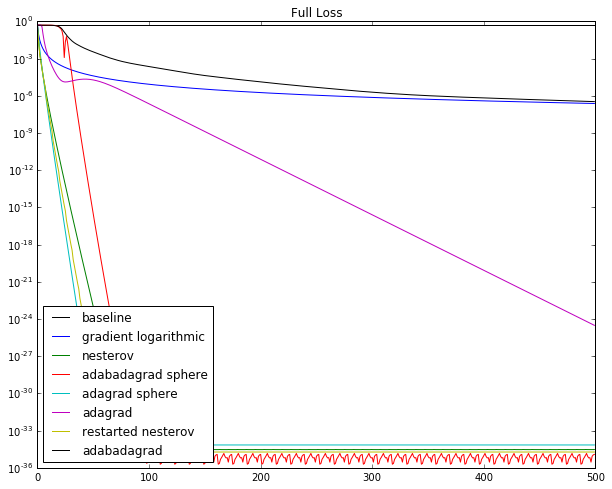

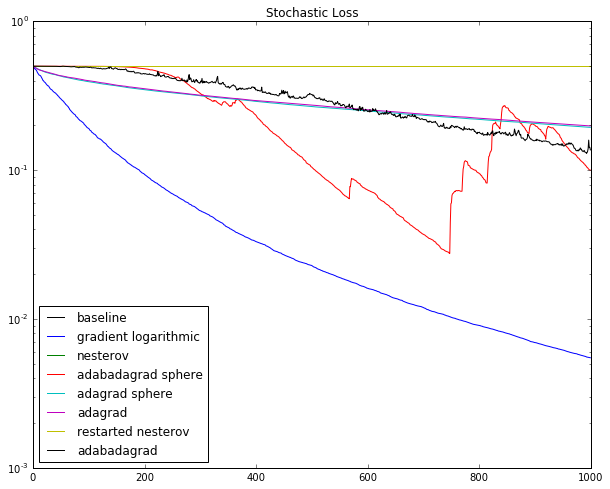

In [686]:
# <!-- hide=True -->
loss_profiles_full = run_experiment(10,500,5000,100)
loss_profiles_stochastic = run_experiment(10,1000,5000,100,full = False)
plot_loss_profiles(loss_profiles_full,name = "Full Loss")
plot_loss_profiles(loss_profiles_stochastic,name = "Stochastic Loss")

Immediately it's clear that the stochastic problem is much harder than the full loss problem, which hopefully makes intuitive sense. We also see that while the Nesterov methods and the <i>spherical</i> adagrad-syle methods do very well in the full loss case, the $O(1/t)$ step-size seems to dominate in the noisy case. Further, the Nesterov methods can't do anything at all in the noisy case. 

Let's try the same thing, but now instead of a design matrix $X\in\R^{5000\times 100}$ we lower the number of samples to $1000$ and increase the number of dimensions to $500$: $X\in\R^{1000\times 500}$.

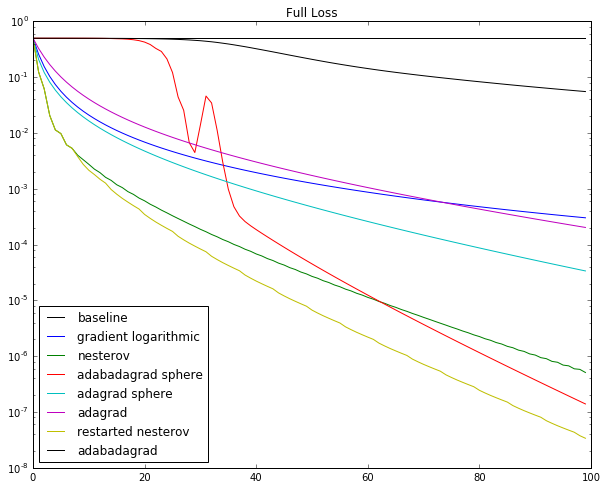

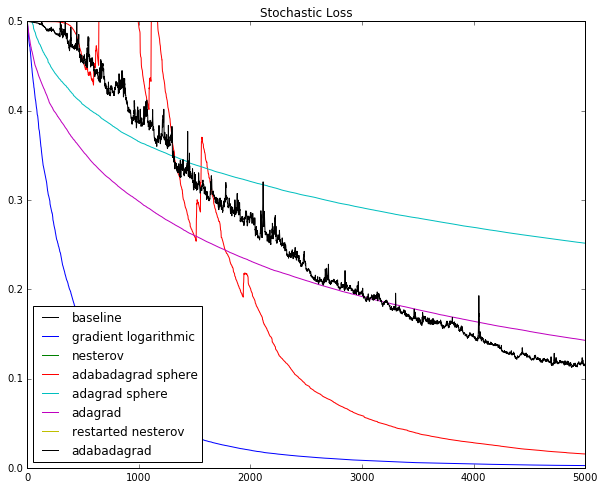

In [688]:
# <!-- hide=True -->
loss_profiles_full = run_experiment(10,100,1000,500)
loss_profiles_stochastic = run_experiment(10,5000,1000,500,full = False)
plot_loss_profiles(loss_profiles_full,name = "Full Loss")
plot_loss_profiles(loss_profiles_stochastic,name = "Stochastic Loss",logscale = False)

Doing this makes the problem a little harder for everybody, but we get qualitatively similar results, with Nesterov methods winning the full-loss case and $O(1/t)$ step sizes winning the stochastic case. Now let's do this for $n=5000$ and $d=500$ (so we've increased $n$ but kept $d$ the same):

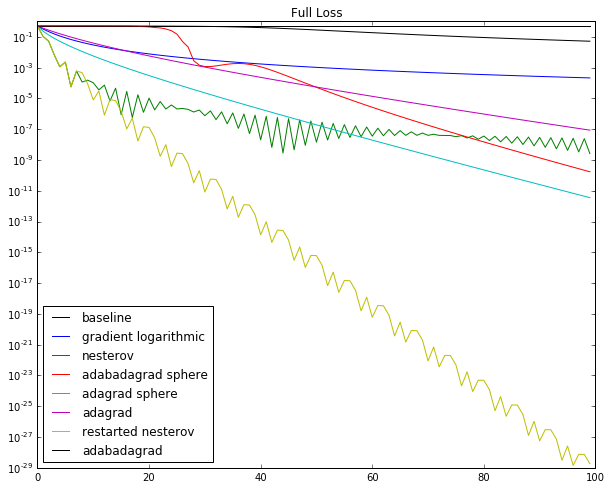

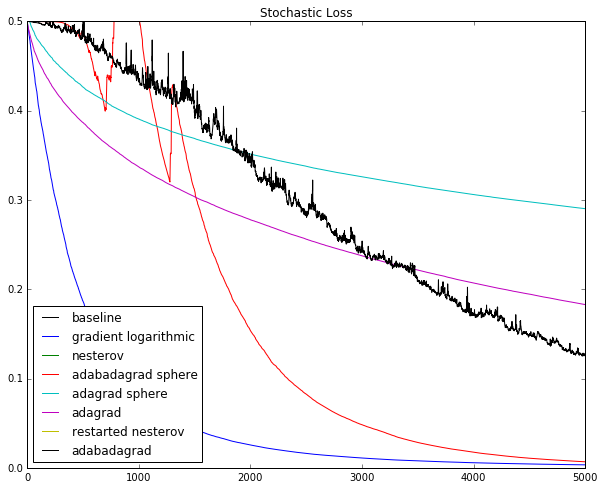

In [689]:
# <!-- hide=True -->
loss_profiles_full = run_experiment(10,100,5000,500)
loss_profiles_stochastic = run_experiment(10,5000,5000,500,full = False)
plot_loss_profiles(loss_profiles_full,name = "Full Loss")
plot_loss_profiles(loss_profiles_stochastic,name = "Stochastic Loss",logscale=False)

Again, the picture is very similar, but things seem to be a little . Let's try something a little different. We'll keep $n=5000$ and $d=500$, but now we'll sample $X$ and $w$ with some skewing. We'll sample each row of $X$ from a multivariate Guassian distribution with some random covariance matrix so that the entries of $X$ are no longer i.i.d. We'll also sample the components of $w$ independently from Guassians of different variances. Then we get the following performance:

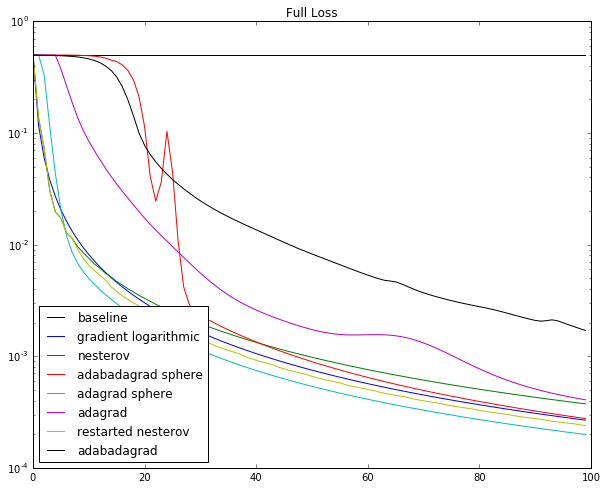

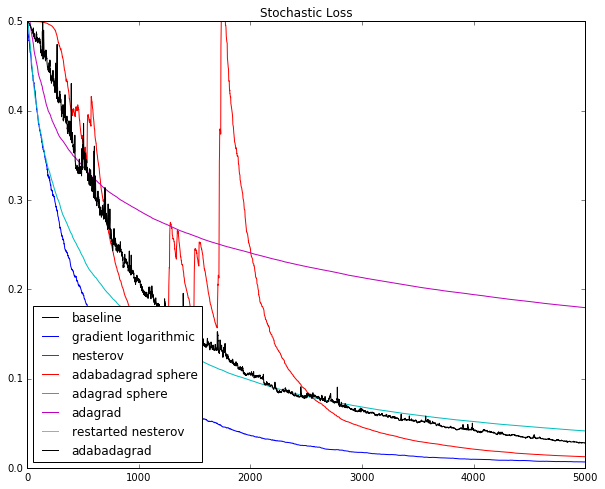

In [690]:
# <!-- hide=True -->
loss_profiles_full = run_experiment(10,100,5000,500,skew=True)
loss_profiles_stochastic = run_experiment(10,5000,5000,500,full = False,skew=True)
plot_loss_profiles(loss_profiles_full,name = "Full Loss")
plot_loss_profiles(loss_profiles_stochastic,name = "Stochastic Loss",logscale=False)

Things don't seem to have changed too much here, but it looks like the adabadagrad methods are doing a little better than they were previously.

<h3>Classification with Hinge Loss</h3>
Moving on from the regression setting, we'll try classification tasks using the hinge loss as a convexification of the 0-1 loss. The problems are generated in the same way as the regression problems: we generate $X$ and $b$ with some $w_\star$ such that $Xw_\star = b$. We set the classification label of the $i$th example $X_i$ to be the sign of $b_i$. First we try a $d=100$ dimensional problem with $n=5000$ samples sampled from the uniform Gaussian as in the first regression tests:

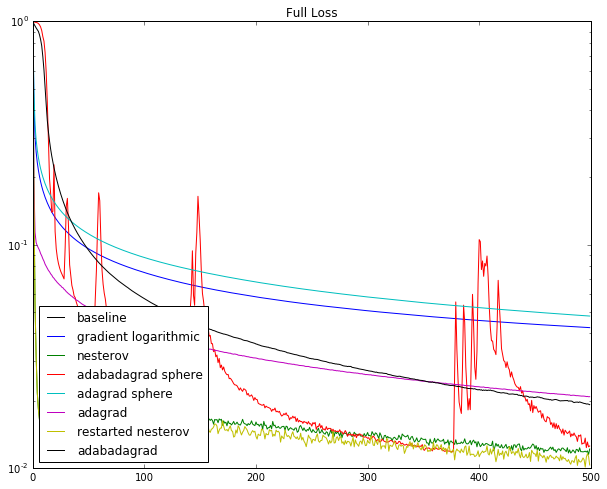

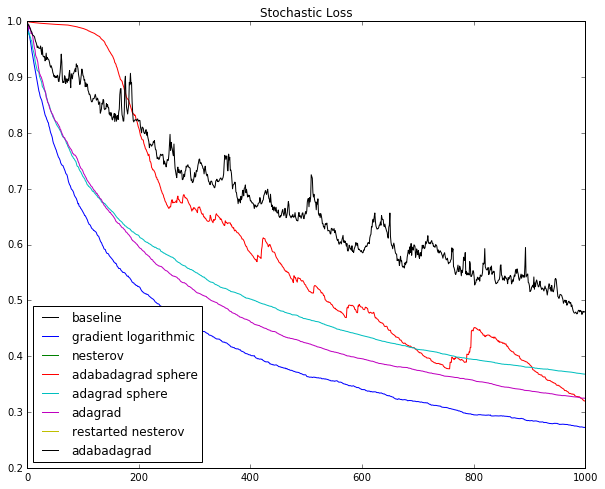

In [691]:
# <!-- hide=True -->
loss_profiles_full = run_experiment(10,500,5000,100,hinge=True)
loss_profiles_stochastic = run_experiment(10,1000,5000,100,full = False,hinge=True)
plot_loss_profiles(loss_profiles_full,name = "Full Loss")
plot_loss_profiles(loss_profiles_stochastic,name = "Stochastic Loss",logscale=False)

Again, this looks qualitatively similar to the regression setting, but now we'll try with some skewing as in the last regression problem:

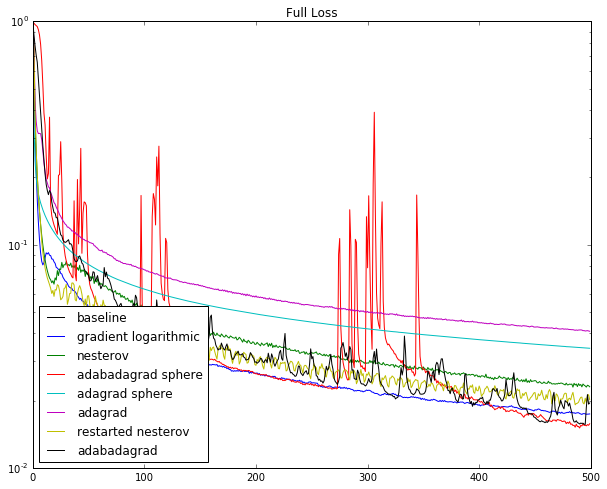

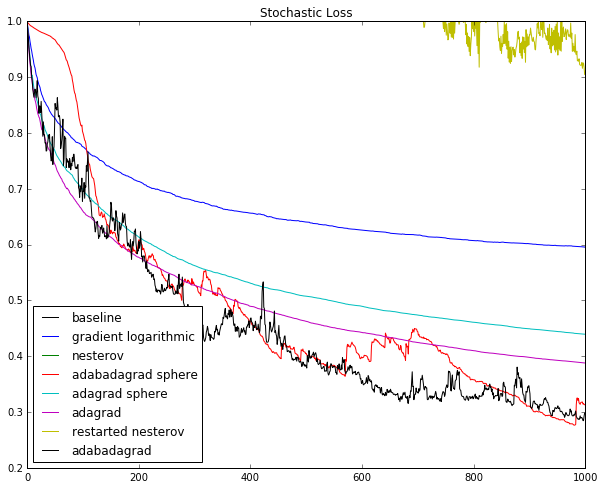

In [692]:
# <!-- hide=True -->
loss_profiles_full = run_experiment(10,500,5000,100,skew=True,hinge=True)
loss_profiles_stochastic = run_experiment(10,1000,5000,100,full = False,skew=True,hinge=True)
plot_loss_profiles(loss_profiles_full,name = "Full Loss")
plot_loss_profiles(loss_profiles_stochastic,name = "Stochastic Loss",logscale=False)

Now for the first time something different occurs: the $O(1/t)$ gradient descent algorithm became much more competitive in the full-loss case, and both adabadagrad algorithms became either dominant or near-best in both cases. Intuitively I suspect this is a result of the different scalings, which adabadagrad can try to learn on-the-fly, while the non-strongly-convex nature of the problem means that the $O(1/t)$ learning-rate schedule is no longer optimal, leaving room for some improvement. However, these are surface observations - frankly I don't know for sure why this sort of behavior happens - for me these plots are mostly useful as a comparative study of different algorithms.